# Entendimiento de análisis de diferencias

Este notebook es un paso a paso para el entendimiento general de las metodologías utilizadas por la IA para el análisis de diferencias en imágenes


## Importación de dependencias

Fuimos agregando las dependencias en el orden en el que las fuimos necesitando. Las dependencias totales están en la siguiente celda, en orden de aparición.


In [1]:
from dotenv import load_dotenv
from pathlib import Path
import os
import cv2
import matplotlib.pyplot as plt

load_dotenv()

# Configuracion de matplotlib para mostrar graficos en linea
%matplotlib inline
plt.rcParams["figure.figsize"] = (14, 6)
plt.rcParams["figure.dpi"] = 100
plt.rcParams["axes.titlesize"] = 13
plt.rcParams["axes.labelsize"] = 11

## Carga de imágenes

En este bloque cargamos las imágenes. Vamos a utilizar el directorio raíz del proyecto que utilizó la IA para no duplicar imágenes


In [ ]:
NOTEBOOK_DIR = Path(
    str(os.getenv("PROYECT_PATH", Path.cwd())) + "/01_diferencia_imagenes")

img1_color = cv2.imread(str(NOTEBOOK_DIR / "img1.jpg"))
img2_color = cv2.imread(str(NOTEBOOK_DIR / "img2.jpg"))

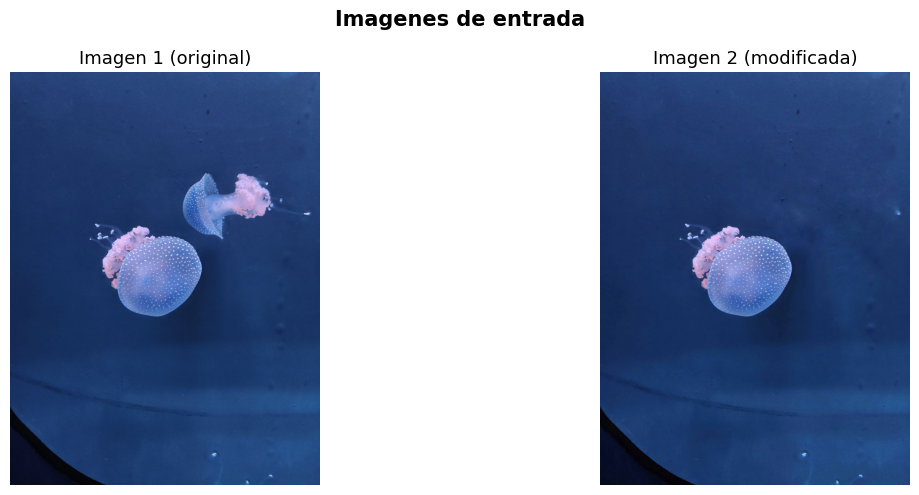

In [3]:
# Visualizar las dos imagenes lado a lado
# Nota: OpenCV carga en BGR, matplotlib espera RGB
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].imshow(cv2.cvtColor(img1_color, cv2.COLOR_BGR2RGB))
axes[0].set_title("Imagen 1 (original)")
axes[0].axis("off")

axes[1].imshow(cv2.cvtColor(img2_color, cv2.COLOR_BGR2RGB))
axes[1].set_title("Imagen 2 (modificada)")
axes[1].axis("off")

plt.suptitle("Imagenes de entrada", fontsize=15, fontweight="bold")
plt.tight_layout()
plt.show()

## Preprocesamiento

Asumimos que las imágenes tienen el mismo tamaño y procedemos a convertirlas a escala de grises.

Esto dado que los diferentes métodos nos indican que es más fácil hacer la comparación en grises


In [4]:
img1_gris = cv2.cvtColor(img1_color, cv2.COLOR_BGR2GRAY)
img2_gris = cv2.cvtColor(img2_color, cv2.COLOR_BGR2GRAY)

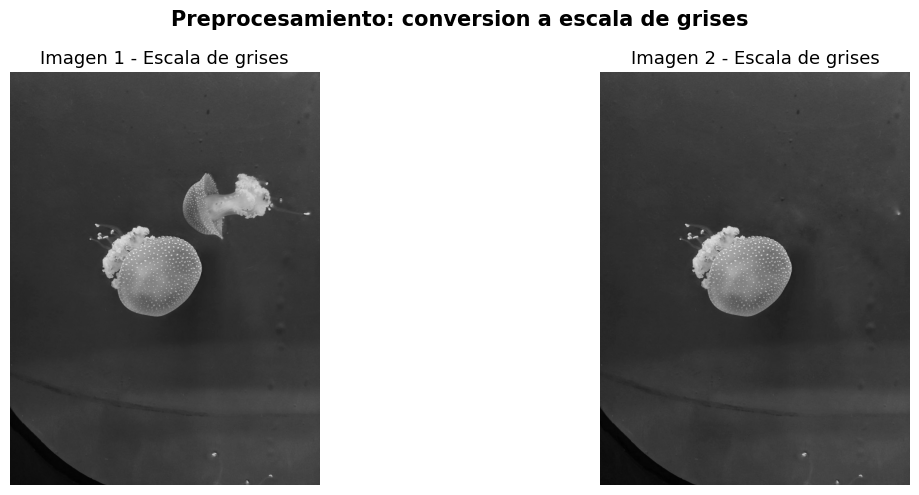

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
axes[0].imshow(img1_gris, cmap="gray")
axes[0].set_title("Imagen 1 - Escala de grises")
axes[0].axis("off")

axes[1].imshow(img2_gris, cmap="gray")
axes[1].set_title("Imagen 2 - Escala de grises")
axes[1].axis("off")

plt.suptitle("Preprocesamiento: conversion a escala de grises",
             fontsize=15, fontweight="bold")
plt.tight_layout()
plt.show()

## Método de diferencia absoluta

Se compara uno a uno los pixeles de la imagen y se almacena en una nueva matriz la diferencia


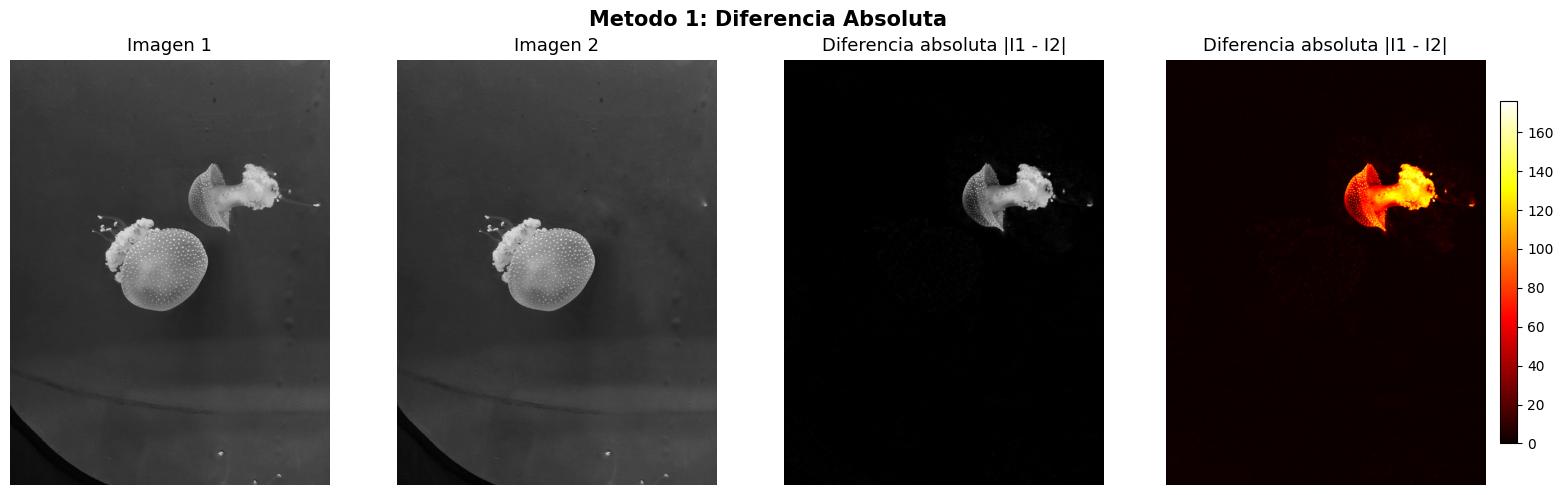

In [11]:
diff_abs = cv2.absdiff(img1_gris, img2_gris)

fig, axes = plt.subplots(1, 4, figsize=(16, 5))

axes[0].imshow(img1_gris, cmap="gray")
axes[0].set_title("Imagen 1")
axes[0].axis("off")

axes[1].imshow(img2_gris, cmap="gray")
axes[1].set_title("Imagen 2")
axes[1].axis("off")

axes[2].imshow(diff_abs, cmap="gray")
axes[2].set_title("Diferencia absoluta |I1 - I2|")
axes[2].axis("off")

# Usar mapa de calor para resaltar diferencias
im = axes[3].imshow(diff_abs, cmap="hot")
axes[3].set_title("Diferencia absoluta |I1 - I2|")
axes[3].axis("off")

plt.colorbar(im, ax=axes[3], fraction=0.046, pad=0.04)
plt.suptitle("Metodo 1: Diferencia Absoluta", fontsize=15, fontweight="bold")
plt.tight_layout()
plt.show()